In [1]:
library(survival)

In [2]:
df = read.csv("final.csv")

In [3]:
head(df,5)

id,death,los,age,gender,cancer,cabg,crt,defib,dementia,...,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
1,0,2,90,2,0,0,0,0,0,...,0,0,4,0,0,0,0,2,NA,416
2,0,10,74,1,0,0,0,0,0,...,0,1,9,1,0,0,0,4,1,648
3,0,3,83,2,0,0,0,0,0,...,0,0,1,0,0,0,0,3,1,466
4,0,1,79,1,0,0,0,0,0,...,1,0,9,2,1,1,0,5,1,441
5,0,17,94,2,0,0,0,0,0,...,0,0,3,0,0,0,0,2,1,371


In [17]:
str(df)

'data.frame':	1000 obs. of  31 variables:
 $ id                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ death               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ los                 : int  2 10 3 1 17 47 3 12 2 2 ...
 $ age                 : int  90 74 83 79 94 89 63 86 72 82 ...
 $ gender              : int  2 1 2 1 2 1 1 2 2 2 ...
 $ cancer              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cabg                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ crt                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ defib               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ dementia            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ diabetes            : int  0 0 0 1 1 0 0 0 0 0 ...
 $ hypertension        : int  0 1 1 1 1 0 1 1 0 0 ...
 $ ihd                 : int  0 1 0 1 0 0 0 0 0 0 ...
 $ mental_health       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ arrhythmias         : int  1 0 1 0 0 0 1 1 0 0 ...
 $ copd                : int  0 0 0 1 0 0 0 0 1 0 ...
 $ obesity             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pvd                 : 

In [4]:
fit <- coxph(Surv(fu_time, death) ~ gender, data=df) # fit the desired model

In [5]:
temp <- cox.zph(fit, transform="km", global=TRUE)

Test the proportionality assumption for gender and enter the resulting p value from the output, rounding to two decimal places if necessary. Different versions of the package give slightly different answers, so we will accept both.

In [6]:
print(temp) # display the results

          rho chisq     p
gender 0.0493  1.19 0.275


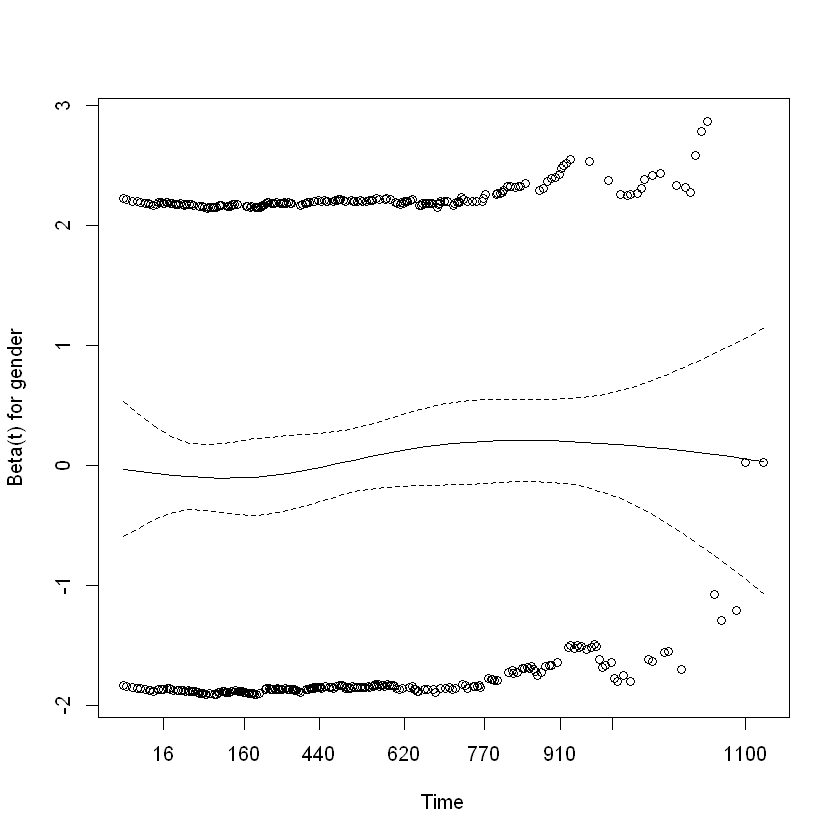

In [7]:
plot(temp) # plot the curves

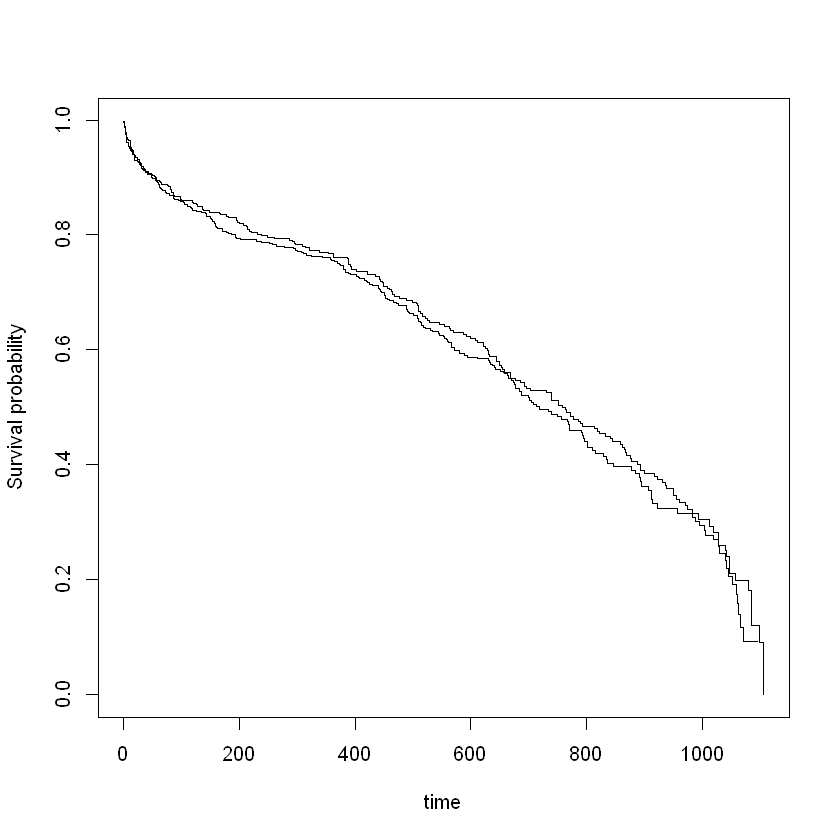

In [10]:
km_fit <- survfit(Surv(fu_time, death) ~ gender, data = df) 

plot(km_fit, xlab = "time", ylab = "Survival probability") # label the axes 

In [13]:
# res.cox <- coxph(Surv(fu_time, death) ~ age, data=df) 
# ggcoxdiagnostics(res.cox, type = "dfbeta", 
#                  linear.predictions = FALSE, ggtheme = theme_bw()) 

In [14]:
# res.cox <- coxph(Surv(fu_time, death) ~ age) 
# ggcoxdiagnostics(res.cox, type = "deviance", 
#                  linear.predictions = FALSE, ggtheme = theme_bw()) 

In [15]:
#ggcoxfunctional(Surv(fu_time, death) ~ age + log(age) + sqrt(age)) 

Now it’s your turn. Try the same code but this time check if the assumption holds for COPD (chronic obstructive pulmonary disease), which is a common and important comorbidity with heart failure. Type the p value that you got into the box, rounding it to two decimal places. 

In [18]:
fit <- coxph(Surv(fu_time, death) ~ copd, data=df)

In [19]:
fit

Call:
coxph(formula = Surv(fu_time, death) ~ copd, data = df)

        coef exp(coef) se(coef)     z     p
copd 0.08951   1.09364  0.10316 0.868 0.386

Likelihood ratio test=0.74  on 1 df, p=0.389
n= 1000, number of events= 492 

In [20]:
temp2 <- cox.zph(fit, transform="km", global=TRUE)

In [21]:
print(temp2)

       rho chisq     p
copd 0.049  1.18 0.278
